In [8]:
from matplotlib import pyplot as plt
from whar_datasets.adapters.pytorch import PytorchAdapter
from whar_datasets.support.getter import WHARDatasetID, get_whar_cfg

In [9]:
cfg = get_whar_cfg(WHARDatasetID.WISDM_12)
dataset = PytorchAdapter(cfg, override_cache=False)

Creating config hash...
Checking download...
Download exists.
Checking sessions...
Sessions exist.
Validating common format...
[########################################] | 100% Completed | 749.00 ms
Common format validated.
Checking windowing...
Loading config hash...
Windowing exists.
subject_ids: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
activity_ids: [0 1 2 3 4 5]


In [10]:
train_loader, val_loader, test_loader = dataset.get_dataloaders(
    train_batch_size=32, override_cache=False, subj_cross_val_group_index=2
)

Loading windows: 100%|██████████| 22408/22408 [00:08<00:00, 2641.43it/s]


Getting normalization parameters...
Loading config hash...
Creating normalization parameters hash...
Loading normalization parameters hash...
train: 16905 | val: 1878 | test: 3625


In [11]:
weights = dataset.get_class_weights(test_loader)
print(weights)

{1: 0.1443529312741086, 0: 0.2785042419634745, 2: 0.47767697257977754, 3: 0.5498839568069531, 5: 1.9223585481869094, 4: 2.6272233491887764}


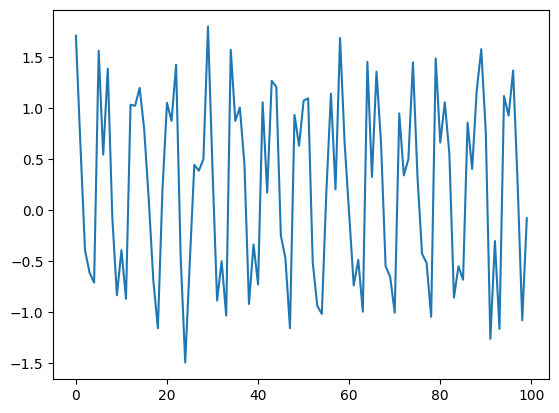

In [13]:
y, x = next(iter(train_loader))

plt.plot(x[0, :, 1])
plt.show()